In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns

import Window_Function
import HERA_hack_FG
import pspec
import make_universe

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['ytick.labelsize']=24
plt.rcParams['xtick.labelsize']=24



%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialize all the classes 

In [52]:
################## TELESCOPE STUFF ##################
dishes = np.array([[0,0],[0,55],[30,30],[0,60],[2,55],[47,2],[45,23],[56,21],[30,115],[48,52],[100,100],[0,200],[115,30],[33,31],[49,11],[21,24],[25,6],[56,9],[12,13],[16,17],[38,17],[60,14],[26,28],[6,45],[3,37],[12,55],[200,0],[145,13],[134,65],[139,163]])
data = np.loadtxt('/Users/hannahfronenberg/desktop/MSC1/HERA Noise/hera_positions_staged/antenna_positions_128.dat')
hera_bls = data[:,:-1]

acorner = np.array([[120,270],[122,276],[120,276],[122,270]])

HERA = HERA_hack_FG.telescope(hera_bls, latitude=-30, channel_width=0.1, Tsys=300, beam_width=3, beam = 'gaussian')

obs = HERA_hack_FG.observation(HERA, 1, 150, 0.01,acorner,1, 0.2, norm = True, pbeam = False)

obs.compute_M(None,None)

Ly = 100
Lx = 100

################### WINDOW STUFF ###############

window = Window_Function.Window_Function(obs.Mmat,obs.sky_shape[0],obs.sky_shape[1],Ly,Lx,40)





In [8]:
obs.sky_shape()

obs.sky_shape[0]
obs.sky_shape[1]

TypeError: 'tuple' object is not callable

In [9]:
obs.observable_coordinates()

array([[2.04203522, 4.71238898],
       [2.04552588, 4.71238898],
       [2.04901654, 4.71238898],
       ...,
       [2.136283  , 4.81361808],
       [2.13977366, 4.81361808],
       [2.14326432, 4.81361808]])

# Define a theory spectrum

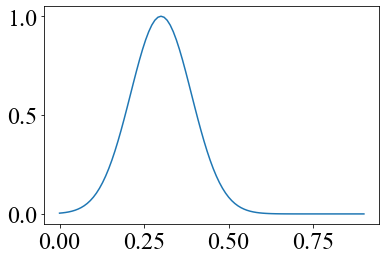

In [10]:
def ps(x):
    mu, sigma = 0.3,0.09
    return  np.exp( - (x - mu)**2 / (2 * sigma**2))


x = np.linspace(0,0.9,100)

plt.plot(x,ps(x))

# Compute and Plot Window Function 

In [61]:
(2*np.pi)/0.3


20.943951023931955

# Spectrum Of Observed Field 

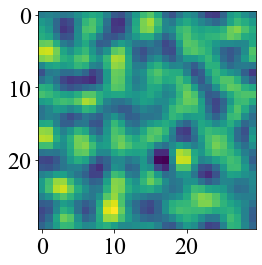

In [53]:
################### MAKE UNIVERSE STUFF ################
Ly = 100
Lx = 100

make_uni = make_universe.universe(ps,obs.sky_shape[0],obs.sky_shape[1],Ly,Lx, mean = 0) #100 Mpc by 100Mpc

universe = make_uni.make_2D_universe()

stacked_sky = np.hstack(universe.T)



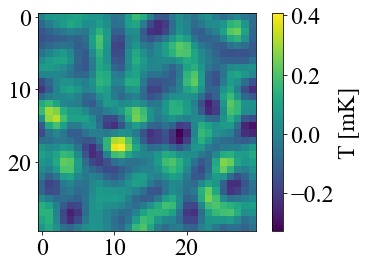

In [12]:
plt.imshow(universe)
cbar = plt.colorbar()
cbar.set_label('T [mK]', fontsize = 24)

[0.00000000e+00 0.00000000e+00 1.33430161e+03 1.30417326e+03
 6.36852798e+03 1.98093216e+04 1.64625318e+03 5.45887836e+04
 7.57092719e+04 1.54840986e+05 1.23905000e+05 1.52286944e+05
 1.88368700e+05 1.13568288e+05 8.18570787e+04 5.10644474e+04
 5.03241018e+04 2.98997954e+04 1.47061100e+04 1.57292262e+04
 8.69742474e+03 2.52874081e+03 8.31353584e+02 4.63231598e+02
 1.25963267e+02 4.14797486e+01 1.64397671e+01 1.68426929e+00
 1.19712598e+00 1.09340094e-01 2.34526364e-02 6.19447332e-03
 7.62176655e-04 1.75687852e-04 8.79788847e-06 6.13371454e-06
 1.39203151e-07 4.84027766e-09 3.16059943e-09 1.39695736e-10
 2.25468137e-11 4.26021313e-13 2.33932429e-15 1.28399512e-15
 0.00000000e+00 2.65072343e-17 2.06828110e-20 0.00000000e+00
 2.69738008e-22 2.10444101e-26]
[ 0.  0.  4.  4.  4.  8.  4. 12.  8. 16.  8. 12. 16. 12. 20. 16. 24. 16.
 12. 28. 16. 36. 16. 32. 24. 28. 44. 16. 44. 28. 36. 32. 36. 52. 16. 50.
 28. 12. 28. 16. 20. 20.  4. 16.  0. 12.  8.  0.  4.  1.]
(array([], shape=(0, 1), dtype=i

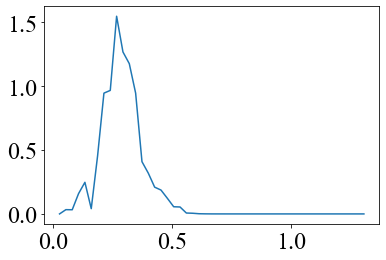

In [54]:
power_spec_universe = pspec.Power_Spectrum(universe,Ly,Lx,50,False) #100 Mpc by 100Mpc --> have to scale fft I think 
p_k = power_spec_universe.compute_2D_pspec()

plt.plot(p_k[0],p_k[1])
# plt.xlim(0,0.3)

print(p_k[1])

In [43]:
kk_universe,edges_universe ,pk_universe = window.compute_pspec_estimate(ps)

print(kk_universe,pk_universe)

[0.02025394 0.03318159 0.06637043 0.0994685  0.13259939 0.16499967
 0.19943541 0.23128035 0.26581748 0.29660475 0.3310828  0.35890555
 0.39813845 0.41397981 0.46141578 0.15830314 0.19350297 0.16601652
 0.05500054 0.23684001 0.05406499 0.25004446 0.09397586 0.3315224
 0.0827074  0.32794507 0.10502203 0.34564888 0.11243508 0.37510297
 0.42790085 0.4645027  0.38294326 0.34584715 0.3444171  0.34563429
 0.34395644 0.34343221 0.34313196 0.34298665] [2.72123351e+00 4.30845681e+00 8.36479216e+00 1.38757296e+01
 1.22808177e+01 7.14493145e+00 1.50646270e+01 6.80634740e+00
 1.18972129e+01 2.97039356e+00 1.57860462e+00 6.66241361e-01
 3.59368750e-01 8.35746243e-02 3.74697280e-02 3.12749746e-02
 1.74972681e-02 1.78729961e-02 1.19900707e-02 1.68951338e-02
 9.28590533e-03 8.30535881e-03 1.17090077e-02 4.86571465e-03
 9.51031562e-03 4.08645461e-03 7.83870616e-03 2.45021999e-03
 4.80457846e-03 1.08503272e-03 1.21653018e-04 5.81198263e-05
 4.06831133e-05 3.24204088e-05 2.90557076e-05 3.19086585e-05
 2.7

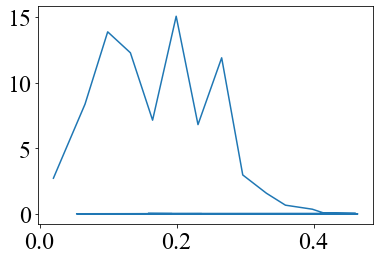

In [44]:
plt.plot(kk_universe,pk_universe)

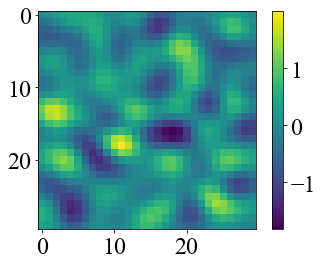

In [34]:
########## CONVOLVE THE MAP ############

sky = np.real(obs.convolve_map(stacked_sky,None,None))
square_sky = np.reshape(sky,(30,30)).T
mean_temp = np.mean(sky)
plt.imshow(square_sky)
plt.colorbar()




In [35]:
np.mean(sky)

0.013645506944653133

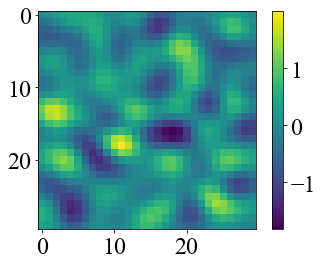

In [36]:
M_applied = np.dot(obs.Mmat,stacked_sky)

plt.imshow(np.real(np.reshape(M_applied,(30,30)).T))
plt.colorbar()

[0.00000000e+00 9.84140657e+04 1.45633755e+06 3.61056149e+05
 2.85492428e+06 6.51756110e+06 2.01171692e+06 4.50268130e+06
 5.90529397e+06 5.68446918e+06 1.13090362e+06 9.15323877e+05
 3.22805979e+05 2.20232162e+05 3.95919246e+04 4.32291131e+04
 2.07239989e+04 2.46363134e+04 2.10722332e+04 1.28797643e+04
 1.87687837e+04 1.15009141e+04 2.49219679e+04 7.30650988e+03
 1.85140462e+04 6.87754967e+03 2.00392930e+04 4.44895220e+03
 1.00738416e+04 2.33157011e+03 9.12435362e+01 2.62379153e+01
 2.91022489e+01 1.91915331e+01 1.05278765e+01 3.78787971e+00
 1.01908325e+01 6.55070417e+00 3.20538227e+00 7.92816986e-01]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 9.84140657e+04 1.45633755e+06 3.61056149e+05
 2.85492428e+06 6.51756110e+06 2.01171692e+06 4.50268130e+06
 5.90529397e+06 5.68446918e+06 1.13090362e+06 9.1

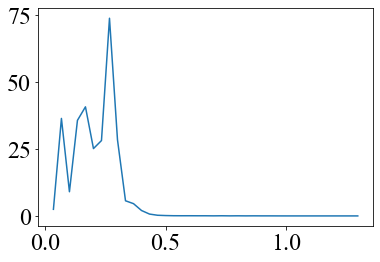

In [39]:
######### POWER SPECTRUM STUFF ###########

power_spec = pspec.Power_Spectrum(square_sky,100,100,40,False) #100 Mpc by 100Mpc --> have to scale fft I think 
pk_hera = power_spec.compute_2D_pspec()

plt.plot(pk_hera[0],pk_hera[1])

print(pk_hera[1])


[0.00000000e+00 1.39204109e+05 3.70842097e+05 5.30258846e+05
 1.19557721e+06 5.65865384e+06 3.94620586e+06 3.47668801e+06
 8.74579633e+05 4.26790712e+06 1.58516323e+06 7.07489764e+05
 4.92129132e+05 2.50517213e+05 6.87757438e+04 2.93081684e+04
 3.19890797e+04 1.91469479e+04 1.76366526e+04 1.25997364e+04
 1.58168266e+04 1.15697021e+04 1.68922358e+04 8.37245248e+03
 1.50444836e+04 7.68185760e+03 2.10815117e+04 8.91351396e+02
 1.11988642e+04 1.15750719e+03 1.67142033e+02 4.80323742e+01
 4.07090577e+00 1.45521369e+00 5.69676261e-01 2.74507063e-01
 4.82751120e-01 2.60562781e-01 1.13682478e-01 2.64718108e-02]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 1.39204109e+05 3.70842097e+05 5.30258846e+05
 1.19557721e+06 5.65865384e+06 3.94620586e+06 3.47668801e+06
 8.74579633e+05 4.26790712e+06 1.58516323e+06 7.0

[0.00000000e+00 1.15424847e+05 3.29620949e+05 3.25632740e+05
 2.68302389e+06 5.79642979e+06 3.94745183e+06 4.88329408e+06
 2.13143483e+06 5.96718484e+06 1.45388246e+06 1.38021213e+06
 5.28247890e+05 3.06531118e+05 2.94210655e+04 8.43442438e+04
 3.77195026e+04 4.94129306e+04 4.99779456e+04 1.41900785e+04
 4.39243000e+04 1.30065640e+04 4.50145855e+04 1.43123156e+04
 3.37822506e+04 1.34639610e+04 3.79310942e+04 7.56882032e+03
 1.93175433e+04 4.21710045e+03 1.81329562e+02 3.37628182e+01
 1.81838523e+01 7.43113597e+00 3.33961522e+00 1.42029396e+00
 3.05342459e+00 1.83241014e+00 8.62016201e-01 2.09186813e-01]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 1.15424847e+05 3.29620949e+05 3.25632740e+05
 2.68302389e+06 5.79642979e+06 3.94745183e+06 4.88329408e+06
 2.13143483e+06 5.96718484e+06 1.45388246e+06 1.3

[0.00000000e+00 1.22328145e+05 9.39313347e+04 1.07505335e+06
 5.19108037e+06 5.67965354e+06 3.24510320e+06 5.47089514e+06
 1.58250447e+06 4.31522533e+06 2.11149512e+06 8.81803278e+05
 3.91617466e+05 1.88760352e+05 3.65575703e+04 5.77800118e+04
 4.20129269e+04 3.16562607e+04 2.48128604e+04 2.11249387e+04
 2.20614482e+04 1.89552849e+04 2.81571183e+04 1.35420464e+04
 2.19185803e+04 1.25049700e+04 2.89041943e+04 4.42887924e+03
 1.43833614e+04 2.43437124e+03 3.69311208e+01 8.80779240e+01
 1.52425897e+01 7.52611002e+00 3.58698250e+00 1.45579802e+00
 3.31476334e+00 2.01670297e+00 9.55442962e-01 2.32601533e-01]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 1.22328145e+05 9.39313347e+04 1.07505335e+06
 5.19108037e+06 5.67965354e+06 3.24510320e+06 5.47089514e+06
 1.58250447e+06 4.31522533e+06 2.11149512e+06 8.8

[0.00000000e+00 1.35405144e+05 5.24222549e+05 1.95363853e+06
 2.51794480e+05 4.84570661e+06 2.22313072e+06 4.62504199e+06
 3.54037012e+06 3.22444913e+06 1.67678852e+06 1.15782350e+06
 2.65010696e+05 1.94237089e+05 1.80407265e+04 3.88922937e+04
 1.35235294e+04 2.81105433e+04 1.89573596e+04 7.65732300e+03
 1.70323108e+04 7.32845161e+03 1.79721867e+04 4.20918450e+03
 1.60978002e+04 3.91356369e+03 1.86000260e+04 6.64973587e+02
 1.01007693e+04 9.60693439e+02 3.01369143e+02 8.77626313e+00
 9.13573591e+00 6.12765330e+00 3.36142119e+00 1.20997352e+00
 3.25010460e+00 2.08654994e+00 1.02012743e+00 2.52206823e-01]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 1.35405144e+05 5.24222549e+05 1.95363853e+06
 2.51794480e+05 4.84570661e+06 2.22313072e+06 4.62504199e+06
 3.54037012e+06 3.22444913e+06 1.67678852e+06 1.1

[0.00000000e+00 1.01581155e+05 2.84061608e+05 3.52195483e+05
 1.52345112e+06 4.33576606e+06 1.68151618e+06 7.14665764e+06
 4.22001505e+06 4.26390924e+06 1.11222799e+06 9.45106475e+05
 2.76472610e+05 3.24858244e+05 3.74084588e+04 5.80648047e+04
 2.28284709e+04 4.43860396e+04 2.22349944e+04 2.42212767e+04
 1.97587748e+04 2.21070126e+04 3.22590015e+04 7.44176882e+03
 2.89627387e+04 7.00850681e+03 3.34360062e+04 1.30828651e+03
 1.70864676e+04 1.18766495e+03 6.58458232e+01 2.13518252e+01
 1.59244332e+01 1.24695090e+01 7.05392748e+00 2.47501494e+00
 6.88052558e+00 4.46068784e+00 2.19276665e+00 5.43529095e-01]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 1.01581155e+05 2.84061608e+05 3.52195483e+05
 1.52345112e+06 4.33576606e+06 1.68151618e+06 7.14665764e+06
 4.22001505e+06 4.26390924e+06 1.11222799e+06 9.4

[0.00000000e+00 5.73267478e+05 9.56944863e+05 9.92961347e+05
 2.40925197e+06 5.06852783e+06 3.66027518e+06 4.06282400e+06
 1.89083544e+06 4.81209665e+06 3.52703022e+06 7.75502849e+05
 3.55509295e+05 3.42044229e+05 3.48555749e+04 9.24748132e+04
 3.41789802e+04 6.01534096e+04 4.00745521e+04 2.94977029e+04
 3.61533486e+04 2.60225241e+04 5.11107835e+04 6.76381687e+03
 4.68460888e+04 6.26205291e+03 4.99740929e+04 1.28232333e+03
 2.54037445e+04 1.36814559e+03 9.27292178e+01 5.49996670e+01
 3.36382394e+01 2.28667388e+01 1.24284487e+01 4.50966385e+00
 1.19912239e+01 7.67916247e+00 3.74947939e+00 9.26428701e-01]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 5.73267478e+05 9.56944863e+05 9.92961347e+05
 2.40925197e+06 5.06852783e+06 3.66027518e+06 4.06282400e+06
 1.89083544e+06 4.81209665e+06 3.52703022e+06 7.7

[0.00000000e+00 5.20670063e+05 7.78620199e+05 1.15369446e+06
 2.18808735e+06 5.27452754e+06 3.59302377e+06 8.47584759e+06
 1.58934403e+06 2.90585468e+06 1.84414203e+06 1.35734444e+06
 2.57719458e+05 2.48256670e+05 2.37464560e+04 6.23922247e+04
 3.26190326e+04 4.03773340e+04 3.36544188e+04 2.43120798e+04
 3.07086075e+04 2.20907720e+04 4.39569792e+04 6.92313769e+03
 3.92205019e+04 6.37306052e+03 4.18190899e+04 2.40394588e+03
 2.09588062e+04 1.53768170e+03 7.42736170e+01 7.41776373e+01
 2.46503881e+01 1.59894957e+01 8.42037986e+00 3.13462972e+00
 8.05860194e+00 5.11379249e+00 2.48450151e+00 6.12439998e-01]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 5.20670063e+05 7.78620199e+05 1.15369446e+06
 2.18808735e+06 5.27452754e+06 3.59302377e+06 8.47584759e+06
 1.58934403e+06 2.90585468e+06 1.84414203e+06 1.3

[0.00000000e+00 2.03289750e+05 1.76292205e+05 1.84726938e+06
 1.03790761e+06 2.33821692e+06 2.92877646e+06 3.52677929e+06
 1.49867779e+06 4.92861248e+06 1.70475941e+06 7.30145801e+05
 3.67782767e+05 2.88126995e+05 5.00827713e+04 4.96729303e+04
 3.11426484e+04 3.02456552e+04 2.48584885e+04 1.64054593e+04
 2.21441203e+04 1.50495087e+04 2.77804790e+04 6.83459552e+03
 2.51685930e+04 6.40449986e+03 2.95404420e+04 9.19872017e+02
 1.56913098e+04 1.47669566e+03 1.70074222e+02 4.68271147e+01
 4.81685023e+01 3.64549565e+01 2.01879562e+01 7.21247174e+00
 1.95588234e+01 1.25850046e+01 6.16011117e+00 1.52378841e+00]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 2.03289750e+05 1.76292205e+05 1.84726938e+06
 1.03790761e+06 2.33821692e+06 2.92877646e+06 3.52677929e+06
 1.49867779e+06 4.92861248e+06 1.70475941e+06 7.3

[0.00000000e+00 1.96014226e+05 4.24560489e+05 1.52527847e+06
 2.56818030e+06 9.52850127e+06 1.34013585e+06 9.02790263e+06
 2.42094843e+06 4.36620514e+06 2.13246650e+06 1.07738441e+06
 5.39736101e+05 1.27930537e+05 1.64445324e+04 5.70608607e+04
 1.77108497e+04 2.77470670e+04 2.50222319e+04 6.06190121e+03
 2.18827240e+04 5.33880608e+03 2.18768539e+04 6.75470296e+03
 1.59329305e+04 6.26166515e+03 1.73566804e+04 3.98771240e+03
 8.93166095e+03 2.24111722e+03 1.03364730e+02 5.47570544e+00
 4.55811246e+00 3.73655944e+00 2.10265604e+00 7.41921939e-01
 2.04456778e+00 1.32049572e+00 6.47561112e-01 1.60315374e-01]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 1.96014226e+05 4.24560489e+05 1.52527847e+06
 2.56818030e+06 9.52850127e+06 1.34013585e+06 9.02790263e+06
 2.42094843e+06 4.36620514e+06 2.13246650e+06 1.0

[0.00000000e+00 1.04356879e+05 8.33034894e+05 6.27635314e+05
 1.95666816e+06 5.73719269e+06 3.99133538e+06 4.55551557e+06
 2.14021292e+06 2.66233877e+06 2.20877083e+06 1.31812522e+06
 3.16633475e+05 2.33342450e+05 2.40578683e+04 7.94435013e+04
 2.58873121e+04 4.75992134e+04 4.74772793e+04 6.51161494e+03
 4.22333228e+04 6.36522237e+03 4.19574642e+04 6.38733190e+03
 3.48764883e+04 5.99957425e+03 3.53073777e+04 4.13420771e+03
 1.82617187e+04 2.64618524e+03 3.00466742e+02 5.66207366e+01
 8.48554871e+01 5.69133638e+01 3.14571671e+01 1.12531943e+01
 3.04926513e+01 1.96315701e+01 9.61378584e+00 2.37873299e+00]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 1.04356879e+05 8.33034894e+05 6.27635314e+05
 1.95666816e+06 5.73719269e+06 3.99133538e+06 4.55551557e+06
 2.14021292e+06 2.66233877e+06 2.20877083e+06 1.3

[0.00000000e+00 1.96761765e+05 2.81218952e+05 7.47762103e+04
 3.09003553e+06 8.06757359e+06 1.29962636e+06 7.66054014e+06
 2.73296157e+06 3.34971997e+06 2.08684019e+06 9.72308544e+05
 1.94908516e+05 1.57534824e+05 3.65105737e+04 4.52520184e+04
 2.55229827e+04 2.67829625e+04 1.51175842e+04 1.87075329e+04
 1.31905292e+04 1.67844350e+04 2.18970832e+04 8.63527324e+03
 1.70198301e+04 8.07877396e+03 2.09752264e+04 3.24003203e+03
 1.09791116e+04 2.21072988e+03 1.24456368e+02 5.74492931e+01
 6.15273387e+01 4.87750815e+01 2.75940388e+01 9.68327584e+00
 2.69166526e+01 1.74505552e+01 8.57844569e+00 2.12639741e+00]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 1.96761765e+05 2.81218952e+05 7.47762103e+04
 3.09003553e+06 8.06757359e+06 1.29962636e+06 7.66054014e+06
 2.73296157e+06 3.34971997e+06 2.08684019e+06 9.7

[0.00000000e+00 1.55052438e+05 1.94953002e+05 7.22110926e+05
 1.22183079e+06 3.84492419e+06 6.16482043e+06 3.76295141e+06
 1.45342722e+06 6.54531030e+06 2.54694807e+06 1.06783760e+06
 1.94499455e+05 2.54591706e+05 5.17857509e+04 7.16730970e+04
 1.98787510e+04 6.02802433e+04 3.21107462e+04 2.36975753e+04
 2.85251353e+04 2.20519626e+04 3.79495247e+04 8.64259899e+03
 3.43191028e+04 8.08790190e+03 3.95517621e+04 1.38536364e+03
 2.06805547e+04 1.62258615e+03 3.59280561e+02 7.57041044e+01
 5.98324641e+01 4.41440880e+01 2.42201233e+01 8.72045586e+00
 2.34155014e+01 1.50302828e+01 7.34775919e+00 1.81651990e+00]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 1.55052438e+05 1.94953002e+05 7.22110926e+05
 1.22183079e+06 3.84492419e+06 6.16482043e+06 3.76295141e+06
 1.45342722e+06 6.54531030e+06 2.54694807e+06 1.0

[0.00000000e+00 4.43269047e+05 4.04739241e+05 8.95703107e+05
 2.85381098e+06 5.94635688e+06 6.43083538e+06 4.69469864e+06
 3.26619382e+06 5.41048746e+06 5.48289799e+06 7.40869752e+05
 3.13095824e+05 2.46207191e+05 4.38166797e+04 4.13837263e+04
 3.30538896e+04 4.01267771e+04 1.04910520e+04 2.86441616e+04
 9.06683917e+03 2.58740964e+04 2.16551849e+04 1.29162327e+04
 1.72182341e+04 1.21248128e+04 2.53637436e+04 2.88239453e+03
 1.50485231e+04 3.94682412e+03 1.89825845e+02 9.16842145e+01
 1.07620340e+02 8.05214795e+01 4.47020591e+01 1.59307029e+01
 4.33850066e+01 2.79700092e+01 1.37072952e+01 3.39275218e+00]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 4.43269047e+05 4.04739241e+05 8.95703107e+05
 2.85381098e+06 5.94635688e+06 6.43083538e+06 4.69469864e+06
 3.26619382e+06 5.41048746e+06 5.48289799e+06 7.4

[0.00000000e+00 8.18077409e+04 1.96242350e+05 1.55907187e+05
 1.03987589e+06 5.75952821e+06 4.16950223e+06 8.35578046e+06
 1.35504187e+06 2.77238955e+06 1.07201256e+06 6.60108332e+05
 2.83158356e+05 3.05160379e+05 3.23207503e+04 3.76940349e+04
 2.62954770e+04 3.62233466e+04 1.24901770e+04 2.38287281e+04
 1.07172567e+04 2.20472707e+04 1.80129429e+04 1.27919664e+04
 1.60775839e+04 1.20951028e+04 2.63717046e+04 8.85172651e+02
 1.34482937e+04 7.51987431e+02 1.50088679e+02 3.73338972e+01
 4.77849891e+01 2.99898656e+01 1.66645473e+01 5.93330951e+00
 1.61802320e+01 1.04365131e+01 5.11620317e+00 1.26652821e+00]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 8.18077409e+04 1.96242350e+05 1.55907187e+05
 1.03987589e+06 5.75952821e+06 4.16950223e+06 8.35578046e+06
 1.35504187e+06 2.77238955e+06 1.07201256e+06 6.6

[0.00000000e+00 1.42777326e+05 2.36751078e+05 2.09783141e+05
 9.24287421e+05 6.86833834e+06 5.61754432e+06 2.27062320e+06
 4.14133917e+05 3.08860887e+06 1.07840237e+06 1.16659508e+06
 2.56193632e+05 2.97772469e+05 2.30795832e+04 4.75971843e+04
 2.12956167e+04 2.35708231e+04 2.76835917e+04 6.99959699e+03
 2.46727418e+04 6.40074656e+03 2.64473869e+04 3.42237206e+03
 2.31227961e+04 3.12685377e+03 2.36882008e+04 1.66906073e+03
 1.17903515e+04 9.35444460e+02 4.63655934e+01 3.73441832e+01
 1.02669017e+01 2.70578984e+00 6.90534178e-01 4.85437191e-01
 4.59270260e-01 1.43971494e-01 2.96133148e-02 2.53367759e-03]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 1.42777326e+05 2.36751078e+05 2.09783141e+05
 9.24287421e+05 6.86833834e+06 5.61754432e+06 2.27062320e+06
 4.14133917e+05 3.08860887e+06 1.07840237e+06 1.1

[0.00000000e+00 2.97438608e+05 3.00344467e+05 4.49427323e+05
 1.88177123e+06 4.12257207e+06 6.66302720e+05 4.50598146e+06
 1.73867492e+06 2.78708572e+06 2.30297580e+06 1.48273609e+06
 2.72976710e+05 1.28260627e+05 3.15364742e+04 5.33355366e+04
 1.75160000e+04 2.48488707e+04 5.22993861e+03 1.81886087e+04
 4.08843864e+03 1.63855055e+04 1.30197872e+04 5.85755442e+03
 1.17077986e+04 5.44704714e+03 1.60845844e+04 4.30912605e+02
 8.33851385e+03 6.16768540e+02 2.26537705e+01 1.36276897e+01
 4.25241404e+00 3.33130949e+00 1.86167539e+00 6.59924561e-01
 1.80969883e+00 1.16877391e+00 5.73333186e-01 1.41972430e-01]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 2.97438608e+05 3.00344467e+05 4.49427323e+05
 1.88177123e+06 4.12257207e+06 6.66302720e+05 4.50598146e+06
 1.73867492e+06 2.78708572e+06 2.30297580e+06 1.4

[0.00000000e+00 1.61750079e+05 1.89236351e+05 5.06312196e+05
 1.31665897e+06 6.61397045e+06 1.86089008e+06 6.58338328e+06
 2.60646145e+06 3.92371419e+06 2.02970821e+06 1.42801406e+06
 3.50471472e+05 1.83266864e+05 3.79201013e+04 5.18297047e+04
 2.33041271e+04 3.18804487e+04 1.38583177e+04 2.30588973e+04
 1.20715640e+04 2.10107628e+04 2.42917716e+04 9.50426609e+03
 1.85137715e+04 8.83959679e+03 2.24477795e+04 3.96974326e+03
 1.16611793e+04 2.45137157e+03 1.63932154e+02 3.88808570e+01
 4.77303792e+00 7.29068219e-01 1.91661661e-01 1.30129346e-01
 1.32237123e-01 4.65121122e-02 1.23783645e-02 1.84330900e-03]
[ 0.  4.  4.  4.  8. 16.  8. 16.  8. 20. 20. 20. 16. 32. 16. 32. 28. 40.
 32. 24. 36. 44. 44. 36. 44. 40. 64. 24. 54. 36. 28. 16. 24. 20. 12.  4.
 12.  8.  4.  1.]
(array([], shape=(0, 1), dtype=int64), (array([0]),))
[0.00000000e+00 1.61750079e+05 1.89236351e+05 5.06312196e+05
 1.31665897e+06 6.61397045e+06 1.86089008e+06 6.58338328e+06
 2.60646145e+06 3.92371419e+06 2.02970821e+06 1.4

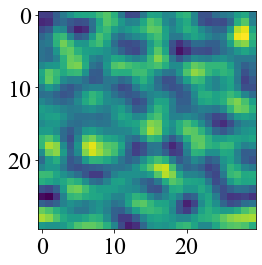

In [47]:
nreal = 100 

sum_spec = np.zeros(39)

for i in range(nreal):
    universe = make_uni.make_2D_universe()
    stacked_sky = np.hstack(universe.T)
    sky = np.real(obs.convolve_map(stacked_sky,None,None))
    square_sky = np.reshape(sky,(30,30)).T
    power_spec_telescope = pspec.Power_Spectrum(square_sky,100,100,nbins = 40,log = False) #100 Mpc by 100Mpc --> have to scale fft I think 
    pk_telescope = power_spec_telescope.compute_2D_pspec()
    sum_spec += pk_telescope[1]

averaged = sum_spec/nreal

30


Text(0, 0.5, 'W(k)')

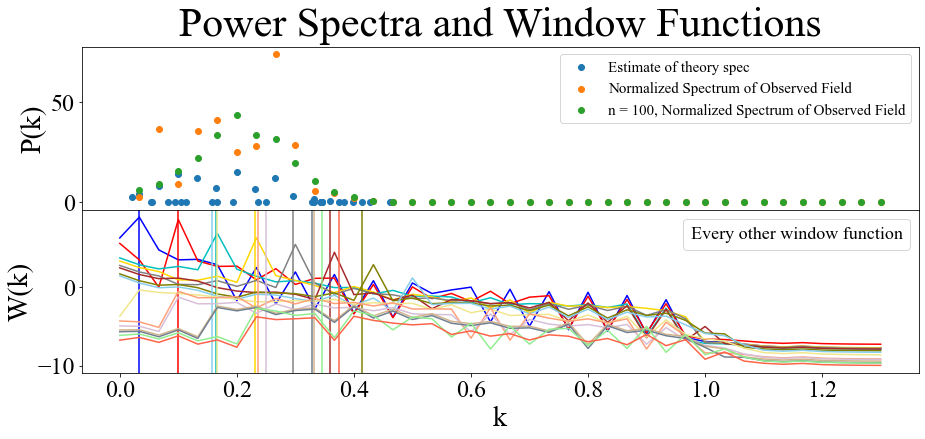

In [50]:
fig, ax = plt.subplots(2, 1, figsize = (15,6),sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})

# ax[0].scatter(kk_universe,ps(kk_universe), label = 'Theory spec')
# ax[0].scatter(kk,pk/max(pk), label = 'Estimate of theory spec -- 50th percentile ')
# ax[0].scatter(edges[:30],pk, label = 'estimate -- bin edge')
ax[0].scatter(kk_universe[:40],pk_universe ,label = 'Estimate of theory spec')
# ax[0].scatter(p_k[0],p_k[1],label = 'Spec of true sky' )
ax[0].scatter(pk_hera[0],pk_hera[1], label = 'Normalized Spectrum of Observed Field')
ax[0].scatter(pk_hera[0],averaged, label = 'n = 100, Normalized Spectrum of Observed Field')


ax[0].set_ylabel('P(k)',fontsize = 28)
ax[0].legend(fontsize = 15)
ax[0].set_title('Power Spectra and Window Functions',fontsize = 42 , y = 1.03)


color = ['k','b','g','r','y','c','m','gold','w','grey','lime','brown','violet','olive','coral','skyblue','linen','khaki','silver','lightsalmon','blueviolet','thistle','peru','tan','aquamarine','slategray','navy','lightgreen','darkred','tomato']
indices = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]

print(len(color))
for i in indices:
    ax[1].plot(edges_universe[:40],np.log(window.window_binned[i]),c = color[i])
    ax[1].axvline(window.k_to_plot[i], c = color[i])


ax[1].legend(['Every other window function'], fontsize = 18, handletextpad=0, handlelength=0)
ax[1].set_xlabel('k',fontsize = 28)
ax[1].set_ylabel('W(k)',fontsize = 28)


In [14]:
square_sky = np.reshape(sky,(50,30)).T
plt.imshow(square_sky)

NameError: name 'sky' is not defined

# Contrived Window Function


For this I will have each window function be a gaussian


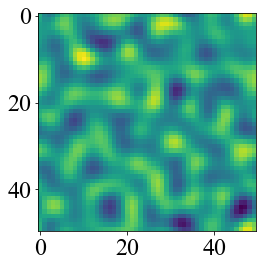

In [44]:
make_uni_fake = make_universe.universe(ps,row_npix = 50, col_npix = 50,Ly =  100, Lx = 100, mean = 0)#100 Mpc by 100Mpc

fake_universe = make_uni_fake.make_2D_universe()

M = np.diag(np.ones(50*50))

fake_stacked_sky = np.hstack(fake_universe.T)




(50, 50)


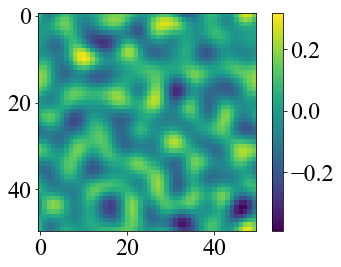

In [45]:
plt.imshow(fake_universe)
plt.colorbar()

print(fake_universe.shape)

/Users/hannahfronenberg/Documents/GitHub/Hannah-Msc/HERA Hack/pspec.py:107: RuntimeWarning: invalid value encountered in true_divide
  T_tilde = a/c


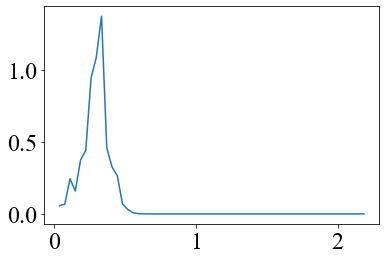

In [46]:
######### POWER SPECTRUM STUFF ###########

power_spec_universe = pspec.Power_Spectrum(data = fake_universe,Ly = 100,Lx = 100,nbins = 60,log = False) #100 Mpc by 100Mpc --> have to scale fft I think 
pk_universe = power_spec_universe.compute_2D_pspec()

plt.plot(pk_universe[0],pk_universe[1])


In [47]:
telescope_sky = np.dot(M,fake_stacked_sky)

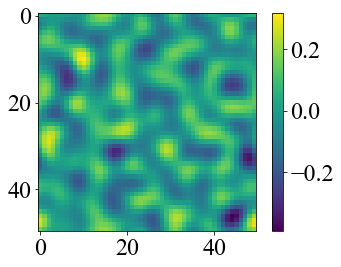

In [65]:
plt.imshow(np.reshape(telescope_sky,(50,50)).T)
plt.colorbar()

telescope_sky = np.reshape(telescope_sky,(50,50)).T

### since the image is exactly the same, the power spectrum binned should be exactly the same!

[0.00000000e+00 2.28329175e+03 2.68887885e+03 2.92696769e+04
 6.33496253e+03 4.47271946e+04 8.81014928e+04 1.12706236e+05
 2.16874544e+05 2.73791289e+05 1.28047079e+05 3.90814736e+04
 9.54291195e+04 2.47755585e+04 6.27109841e+03 2.86851759e+03
 9.74540854e+02 2.13897712e+02 6.23187794e+01 7.08779297e+00
 1.00304727e+00 4.71319773e-02 2.20764679e-02 1.08157285e-03
 2.23041372e-04 5.91450748e-06 1.41266559e-07 1.38883881e-08
 3.78316932e-10 1.62649494e-11 6.61649307e-13 9.38220466e-15
 1.22997469e-16 1.76508671e-18 2.82524007e-20 1.71309997e-22
 4.74451907e-24 3.96625905e-26 2.17091998e-27 5.17086624e-27
 2.70093708e-27 2.33727662e-27 3.01293493e-27 1.54124974e-27
 9.25884915e-28 8.59515993e-28 6.66259821e-28 4.31813221e-28
 7.71151441e-28 9.70528499e-28 6.78805059e-28 5.46777034e-28
 3.12247723e-28 7.46773648e-29 5.92146585e-28 2.42853697e-28
 1.59510397e-28 9.41284235e-29 1.27487246e-28 1.72716365e-29]
[  0.   4.   4.  12.   4.  12.  20.  12.  20.  20.  28.  12.  36.  36.
  20.  36.  4

[autoreload of Window_Function failed: Traceback (most recent call last):
  File "/Users/hannahfronenberg/miniconda3/envs/py3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/hannahfronenberg/miniconda3/envs/py3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/hannahfronenberg/miniconda3/envs/py3/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/hannahfronenberg/miniconda3/envs/py3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 786, in exec_module
  File "<frozen importlib._bootstrap_external>", line 923, in get_code
  File "<frozen importlib._bootstrap_external>", line 853, in source_to_code
  File "<frozen import

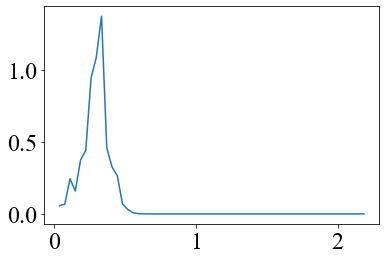

In [67]:
power_spec_telescope = pspec.Power_Spectrum(telescope_sky,100,100,nbins = 60,log = False) #100 Mpc by 100Mpc --> have to scale fft I think 
pk_telescope = power_spec_telescope.compute_2D_pspec()

plt.plot(pk_telescope[0],pk_telescope[1])

In [68]:
window_test = Window_Function.Window_Function(M,50,50,100,100,50)
kk_test, bin_test, pk_test = window_test.compute_pspec_estimate(ps)

/Users/hannahfronenberg/Documents/GitHub/Hannah-Msc/HERA Hack/pspec.py:107: RuntimeWarning: invalid value encountered in true_divide
  T_tilde = a/c


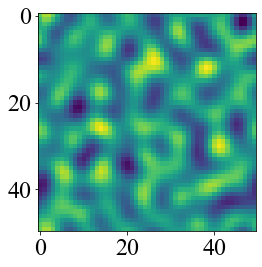

In [51]:
nreal = 300 

sum_spec = np.zeros(59)

for i in range(nreal):
    fake_universe = make_uni_fake.make_2D_universe()
    power_spec_telescope = pspec.Power_Spectrum(fake_universe,100,100,nbins = 60,log = False) #100 Mpc by 100Mpc --> have to scale fft I think 
    pk_telescope = power_spec_telescope.compute_2D_pspec()
    sum_spec += pk_telescope[1]

averaged = sum_spec/nreal

In [52]:
window_normalized = []

#normalization
for i in range(window_test.window_sorted.shape[0]):
    norm = 1/(np.sum(window_test.window_sorted[i])) #find the normalization factor which is 1/sum of the row
    window_normalized.append(window_test.window_sorted[i]*norm)

estimate = np.dot(window_normalized,ps(window_test.k_sorted))



30


/Users/hannahfronenberg/miniconda3/envs/py3/lib/python3.9/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0, 0.5, 'W(k)')

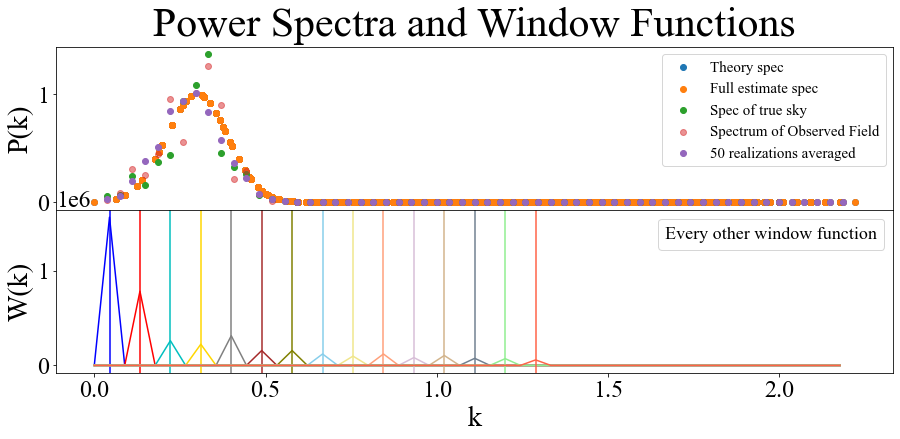

In [54]:
fig, ax = plt.subplots(2, 1, figsize = (15,6),sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})

ax[0].scatter(window_test.k,ps(window_test.k), label = 'Theory spec')
ax[0].scatter(window_test.k_sorted,estimate,label = 'Full estimate spec')
# ax[0].scatter(kk_test[1:],pk_test[1:], label = 'Estimate of theory spec -- 50th percentile ')
ax[0].scatter(pk_universe[0],pk_universe[1] ,label = 'Spec of true sky')
ax[0].scatter(pk_telescope[0],pk_telescope[1], alpha = 0.5, label = 'Spectrum of Observed Field')
ax[0].scatter(pk_universe[0],averaged, label = '50 realizations averaged')
ax[0].set_ylabel('P(k)',fontsize = 28)
ax[0].legend(fontsize = 15)
ax[0].set_title('Power Spectra and Window Functions',fontsize = 42 , y = 1.03)


color = ['k','b','g','r','y','c','m','gold','w','grey','lime','brown','violet','olive','coral','skyblue','linen','khaki','silver','lightsalmon','blueviolet','thistle','peru','tan','aquamarine','slategray','navy','lightgreen','darkred','tomato']
indices = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]

print(len(color))

for i in indices: 
    ax[1].plot(bin_test[:window_test.nbins],window_test.window_binned[i],c = color[i]) 
    ax[1].axvline(window_test.k_to_plot[i], c = color[i])


ax[1].legend(['Every other window function'], fontsize = 18, handletextpad=0, handlelength=0)
ax[1].set_xlabel('k',fontsize = 28)
ax[1].set_ylabel('W(k)',fontsize = 28)



# Test Pspec Normalization 

Parseval's for DFT

$$\sum_{n=0} ^{N-1} |x(n)|^2 = \frac{1}{N} \sum_{k=0} ^{N-1} |\tilde{x}(k)|^2 $$

So in this case, we can check that everything is normalized in our power spectrum by verifying the following

$$\sum_{n=0} ^{N-1} |T(x_n)|^2 = \frac{1}{N} \sum_{k=0} ^{N-1} |\tilde{T}(k)|^2 \approx \frac{V}{N}\sum_{k=0} ^{N-1} P(k) $$

This only work, I believe, if you have a field of mean 0.

Keep in mind that the range of k might not be the same as the range of n! For example, in the sum for the temperature, N will be N = npix, whereas the N in the power sum will be N = nbins. That is, 

$$\sum_{n=0} ^{\rm{npix}-1} |T(x_n)|^2 = \frac{1}{\rm{npix}} \sum_{k=0} ^{\rm{npix}-1} |\tilde{T}(k)|^2 \approx \frac{V}{\rm{nbins}}\sum_{k=0} ^{\rm{nbins}-1} P(k) $$


In [56]:
sum_T_squared = np.sum((fake_stacked_sky**2))
                       
fft_T = np.fft.fft2(telescope_sky)

sum_T_tilde = np.dot(np.reshape(fft_T,(2500,)),np.reshape(np.conj(fft_T),(2500,)))*(1/len(fake_stacked_sky))


vol = power_spec_telescope.Ly * power_spec_telescope.Ly

theory_p = np.sum(ps(power_spec_telescope.k))*(vol/len(ps(power_spec_telescope.k)))

print(ps(power_spec_telescope.k))
print(np.reshape(fft_T,(2500,))*np.reshape(np.conj(fft_T),(2500,)))

print(vol)
# sum_T_tilde should be the same as sum_pspec up to some binning errors 
sum_pspec = np.sum(pk_telescope)*(vol/len(pk_telescope[1]))


[1.06030736e-99 3.19152324e-95 6.11047678e-91 ... 2.02571250e-82
 1.71865187e-86 9.28926469e-91]
[  0.37329559+0.j  67.49069048+0.j 350.24904201+0.j ... 224.73503087+0.j
 102.80517509+0.j  31.87697019+0.j]
10000


In [57]:
print(sum_T_squared,sum_T_tilde,theory_p,sum_pspec) #I think that this is decently close. 
#Probs the discrepancy is due to binning


26.862882606168885 (26.862882606168885+0j) 430.8645784253049 12161.114087277385


2725.3294619394023


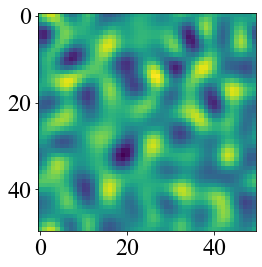

In [58]:
nreal = 100 
bins = 60

sum_spec = 0
sum_T = 0
sum_fft = 0

for i in range(nreal):
    fake_universe = make_uni_fake.make_2D_universe()
    fft_T = np.fft.fft2(fake_universe)
    power_spec_telescope = pspec.Power_Spectrum(fake_universe,100,100,nbins = bins,log = False) #100 Mpc by 100Mpc --> have to scale fft I think 
    pk_telescope = power_spec_telescope.compute_2D_pspec()
    sum_spec += np.sum(pk_telescope[1])*(vol/len(pk_telescope[0]))
    sum_T += np.sum((np.reshape(fake_universe,(2500,)))**2)
    sum_fft += np.dot(np.reshape(fft_T,(2500,)),np.reshape(np.conj(fft_T),(2500,)))*(1/2500)
    



print(sum_T)
    
averaged_T = sum_fft/nreal
averaged_T_tilde = sum_fft/nreal
averaged_spec = sum_spec/nreal


In [59]:
print(averaged_T,averaged_T_tilde,averaged_spec)

(27.25329461939402+0j) (27.25329461939402+0j) 1045.749298628786


In [61]:
0/6

0.0

ZeroDivisionError: division by zero

In [94]:
arg = 1,2

In [95]:
print(arg)

(1, 2)
